# Physical measures Dataset Analysis

Importing libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading data

In [ ]:
# Copia de Physical_measures_data.tsv contains the data for the analysis
# Load the dataset
physical_measures_df = pd.read_csv('Copia de Physical_measures_data.tsv', sep='\t', low_memory=False)

In [ ]:
# Copia-de-Physical_measures_chars.csv contains the metadata for the analysis
# Load the metadata
physical_measures_chars_df = pd.read_csv('Copia-de-Physical_measures_chars.csv', sep=',')

In [ ]:
# Display the first five rows of the DataFrame
physical_measures_df.head()

,eid,f_21_0_0,f_21_1_0,f_21_2_0,f_21_3_0,f_36_0_0,f_36_1_0,f_36_2_0,f_36_3_0,f_37_0_0,...,f_23128_3_0,f_23129_0_0,f_23129_1_0,f_23129_2_0,f_23129_3_0,f_23130_0_0,f_23130_1_0,f_23130_2_0,f_23130_3_0,f_39_0_0
0,1000012,1.0,NaN,NaN,NaN,3782.0,NaN,NaN,NaN,NaN,...,NaN,18.7,NaN,NaN,NaN,17.9,NaN,NaN,NaN,002872
1,1000021,1.0,NaN,NaN,NaN,3780.0,NaN,NaN,NaN,NaN,...,NaN,37.9,NaN,NaN,NaN,36.5,NaN,NaN,NaN,002872
2,1000035,1.0,NaN,NaN,NaN,163.0,NaN,NaN,NaN,NaN,...,NaN,22.5,NaN,NaN,NaN,21.5,NaN,NaN,NaN,002882
3,1000044,1.0,3.0,NaN,NaN,3780.0,1046.0,NaN,NaN,NaN,...,NaN,44.0,NaN,NaN,NaN,42.3,NaN,NaN,NaN,002898
4,1000053,1.0,NaN,NaN,NaN,1058.0,NaN,NaN,NaN,NaN,...,NaN,25.3,NaN,NaN,NaN,24.2,NaN,NaN,NaN,002889


In [7]:
# Display the first five rows of the DataFrame
physical_measures_chars_df.head()

,Field,FieldID,ValueType,Coding,Category,Participants,Items,Stability,Units,ItemType,Strata,Sexed,Instances,Array,Notes,Link,Path
0,Weight method,21,Categorical single,100261.0,100010,500718,595701,Complete,NaN,Data,Primary,Unisex,4,1,Indicates whether weight was entered into the ...,http://biobank.ndph.ox.ac.uk/ukb/field.cgi?id=21,Assessment centre > Physical measures > Anthro...
1,Blood pressure device ID,36,Text,NaN,100011,498814,585914,Complete,NaN,Data,Auxiliary,Unisex,4,1,Blood pressure (Omron) gadget ID,http://biobank.ndph.ox.ac.uk/ukb/field.cgi?id=36,Assessment centre > Physical measures > Blood ...
2,Blood pressure manual sphygmomanometer device ID,37,Text,NaN,100011,498814,585914,Complete,NaN,Data,Auxiliary,Unisex,4,1,Blood pressure manual sphygmomanometer gadget ID,http://biobank.ndph.ox.ac.uk/ukb/field.cgi?id=37,Assessment centre > Physical measures > Blood ...
3,Height measure device ID,39,Text,NaN,100010,498057,591956,Complete,NaN,Data,Auxiliary,Unisex,4,1,Height measure gadget id,http://biobank.ndph.ox.ac.uk/ukb/field.cgi?id=39,Assessment centre > Physical measures > Anthro...
4,Manual scales device ID,40,Text,NaN,100010,498057,591956,Complete,NaN,Data,Auxiliary,Unisex,4,1,Manual scales gadget id,http://biobank.ndph.ox.ac.uk/ukb/field.cgi?id=40,Assessment centre > Physical measures > Anthro...


In [8]:
# Creating a dictionary to rename the columns in physical_measures_df
# The dictionary will map the original column names to the new names based on the metadata
column_dic = {}
for column in physical_measures_df.columns.drop('eid'):
    try:
        field_id = column.split('_')[1]
        match = physical_measures_chars_df.loc[physical_measures_chars_df['FieldID'].astype(str) == field_id,'Field']
        if not match.empty:
            column_dic[column] = f"{match.iloc[0]}_{column.split('_')[2]}_{column.split('_')[3]}"
    except IndexError:
        print(f"Unexpected format in column {column} will be ignored.")


# Rename the columns in physical_measures_df using the dictionary
# The 'eid' column is not renamed
physical_measures_df.rename(columns=column_dic, inplace=True)

Dimensions of the initial DataFrame

In [9]:
physical_measures_df.shape

(502180, 249)

## Preprocessing

Duplicate columns

In [10]:
# Finding duplicated columns 
duplicate_list = physical_measures_df.columns[physical_measures_df.columns.duplicated()].to_list()
print(len(duplicate_list),"duplicated columns found")
print("Duplicate columns:", duplicate_list)

8 duplicated columns found
Duplicate columns: ['Weight_0_0', 'Weight_1_0', 'Weight_2_0', 'Weight_3_0', 'Body mass index (BMI)_0_0', 'Body mass index (BMI)_1_0', 'Body mass index (BMI)_2_0', 'Body mass index (BMI)_3_0']


Rename duplicate columns

In [11]:
# list of columns
cols = physical_measures_df.columns.tolist()
# Iterate through the list of duplicated columns
for duplicate_cols in duplicate_list:
    idx = [i for i, x in enumerate(cols) if x == duplicate_cols]
    physical_measures_df.columns.values[idx[0]] = f'0_{duplicate_cols}'
    physical_measures_df.columns.values[idx[1]] = f'1_{duplicate_cols}'

In [12]:
# Checking the difference between duplicated columns, to see if they are the same
# This will create a new DataFrame with the differences between the two columns
res = physical_measures_df['0_Weight_0_0'] - physical_measures_df['1_Weight_0_0']

print('Maximum difference:', res.max())
print('Minimum difference:', res.min())

Maximum difference: 0.0
Minimum difference: 0.0


In [13]:
# Checking the difference between duplicated columns, to see if they are the same
# This will create a new DataFrame with the differences between the two columns
res = physical_measures_df['0_Body mass index (BMI)_0_0'] - physical_measures_df['1_Body mass index (BMI)_0_0']
print('Maximum difference:', res.max())
print('Minimum difference:', res.min())

Maximum difference: 4.587600000000002
Minimum difference: -13.303799999999999


Merge duplicate columns using combine_first function

In [14]:
for duplicate_cols in duplicate_list:
    # Merge the columns
    # Use combine_first to fill NaN values in the first column with values from the second column
    physical_measures_df[duplicate_cols] = physical_measures_df[f'0_{duplicate_cols}'].combine_first(physical_measures_df[f'1_{duplicate_cols}'])
    # Romve columns with suffixes
    physical_measures_df.drop([f'0_{duplicate_cols}', f'1_{duplicate_cols}'], axis=1, inplace=True)

In [15]:
# Verifying that the columns have been merged
# Check the shape of the DataFrame after merging
duplicate_list = physical_measures_df.columns[physical_measures_df.columns.duplicated()].to_list()
print(len(duplicate_list), "duplicated columns found")
print("Duplicate columns:", duplicate_list)


0 duplicated columns found
Duplicate columns: []


Changing data type

In [16]:

# text type variables according to chars file
col_text = ['Blood pressure device ID','Blood pressure manual sphygmomanometer device ID','Height measure device ID',
            'Manual scales device ID','Seating box device ID','Impedance device ID','Tape measure device ID']

# categorical variables according to chars file
col_categories = ['Weight method', 'Seating box height', 'Method of measuring blood pressure',
                  'Reason for skipping weight', 'Reason for skipping hip measurement','Reason for skipping standing height',
                  'Reason for skipping sitting height']


for col in physical_measures_df.columns:
  
  # get the column name without the suffix
  col_name = col.split('_')[0]
  # Verify if the column name is in the text or categories list
  # and change the corresponding data type
  if col_name in col_text:
    physical_measures_df[col] = physical_measures_df[col].astype('string')
  if col_name in col_categories:
    physical_measures_df[col] = physical_measures_df[col].astype("Int32").astype('category')

Deleting (Irrelevant) columns of text type

In [17]:
# Iterating through the list of columns
for col in physical_measures_df.columns:
    col_name = col.split('_')[0]
    # Verify if the column name is in the text or categories list
    # and drop the column if it is in the text list
    if col_name in col_text:
        physical_measures_df.drop(col, axis=1, inplace=True)

Deleting (Irrelevant) columns of Categories type

In [18]:
# Iterating through the list of columns
for col in physical_measures_df.columns:
    col_name = col.split('_')[0]
    # Verify if the column name is in the text or categories list
    # and drop the column if it is in the text list
    if col_name in col_categories:
        physical_measures_df.drop(col, axis=1, inplace=True)

In [19]:
physical_measures_df.shape

(502180, 195)

Filtering the columns for instance 0 represents the first stage of the study; the others are excluded.

In [20]:

# Filter the columns that contain '0'(First instance) in the second part of the column name
# and keep the 'eid' column
filtered_columns = [col for col in physical_measures_df[physical_measures_df.columns.difference(['eid'])].columns if '0' in col.split('_', 2)[1]]
filtered_columns.append('eid')
filtered_physical_measures_df = physical_measures_df[filtered_columns]

This significantly reduces the dimensionality of the dataset.

In [21]:
# This reduce significally the dimension of the dataset
# Display the shape of the filtered DataFrame
filtered_physical_measures_df.shape

(502180, 52)

Merging columns containing copies of the samples

In [22]:
# Create a new DataFrame to store the merged columns
new_physical_measures_df = pd.DataFrame(filtered_physical_measures_df['eid'])

for col in filtered_physical_measures_df.columns[:-1]:
    
    # get the column name without the suffix
    col_name = col.split('_')[0]
    
    # Check if the column name already exists in the new DataFrame
    # if it exists, combine the columns
    if col_name in new_physical_measures_df:
        new_physical_measures_df[col_name] = new_physical_measures_df[col_name].combine_first(physical_measures_df[col])
    else:
        # If it doesn't exist, add the column to the new DataFrame
        new_physical_measures_df[col_name] = filtered_physical_measures_df[col]

Deleting irrelevant numeric variables

In [23]:
new_physical_measures_df.drop(['Time since interview start at which blood pressure screen(s) shown','Seated height','Sitting height','Body mass index (BMI)'], axis=1, inplace=True)

In [24]:
new_physical_measures_df.shape

(502180, 41)

Finding missing values

In [25]:
# Dataframe with amount of null values
# and percentage of null values
info = pd.DataFrame({
    # type of the column
    'Type': new_physical_measures_df.dtypes,
    # number of null values
    'Null_values': new_physical_measures_df.isnull().sum(),
    # percentage of null values
    'Null_Percentage': (new_physical_measures_df.isnull().sum() / len(new_physical_measures_df)) * 100,
    # number of unique values
    'Unique_values': new_physical_measures_df.nunique()
})
# Show the info dataFrame sorted by Null_Percentage
print(info.sort_values(by='Null_Percentage', ascending=False))

                                                   Type  Null_values  \
Weight, manual entry                            float64       494834   
Systolic blood pressure, manual reading         float64       458397   
Pulse rate (during blood-pressure measurement)  float64       458397   
Diastolic blood pressure, manual reading        float64       458397   
Systolic blood pressure, automated reading      float64        30110   
Diastolic blood pressure, automated reading     float64        30105   
Pulse rate, automated reading                   float64        30105   
Whole body fat mass                             float64        10965   
Trunk predicted mass                            float64        10583   
Trunk fat-free mass                             float64        10534   
Trunk fat mass                                  float64        10450   
Trunk fat percentage                            float64        10423   
Body fat percentage                             float64        1

Deleting columns with a percentage greater than 90% NaN

In [26]:
# Filtering columns with more than 90% of null values
# and dropping them from the DataFrame
null_cols  = info[info['Null_Percentage'] > 90].sort_values(by='Null_Percentage', ascending=False)
null_cols_list = null_cols.index.tolist()
new_physical_measures_df.drop(null_cols_list, axis=1, inplace=True)

Aggregating features 

In [27]:
# List of similar columns
similar_cols = ['Impedance of leg', 'Impedance of arm', 'Leg fat percentage', 'Leg fat mass', 'Leg fat-free mass', 'Leg predicted mass','Arm fat percentage', 'Arm fat mass', 'Arm fat-free mass', 'Arm predicted mass',]
# Check the correlation between the columns
for col in similar_cols:
    corelation = new_physical_measures_df[f'{col} (right)'].corr(new_physical_measures_df[f'{col} (left)'])
    print(f"Correlation between {col} (right) y {col} (left):", corelation)

Correlation between Impedance of leg (right) y Impedance of leg (left): 0.9341222491278268
Correlation between Impedance of arm (right) y Impedance of arm (left): 0.9532087795900743
Correlation between Leg fat percentage (right) y Leg fat percentage (left): 0.9901722061136742
Correlation between Leg fat mass (right) y Leg fat mass (left): 0.9925383526853193
Correlation between Leg fat-free mass (right) y Leg fat-free mass (left): 0.9917282738796052
Correlation between Leg predicted mass (right) y Leg predicted mass (left): 0.9919207287548473
Correlation between Arm fat percentage (right) y Arm fat percentage (left): 0.9896243053590077
Correlation between Arm fat mass (right) y Arm fat mass (left): 0.9935250504192633
Correlation between Arm fat-free mass (right) y Arm fat-free mass (left): 0.9878869257134464
Correlation between Arm predicted mass (right) y Arm predicted mass (left): 0.9884640188915602


In [28]:
# Iterating through the list of similar columns
for col in similar_cols:
    # Check the difference between the columns
    diff = np.abs(new_physical_measures_df[f'{col} (right)'] - new_physical_measures_df[f'{col} (left)'])
    print(f"mean absolute difference between {col} (right) y {col} (left):", diff.mean())

mean absolute difference between Impedance of leg (right) y Impedance of leg (left): 8.14803169770519
mean absolute difference between Impedance of arm (right) y Impedance of arm (left): 11.889350285069666
mean absolute difference between Leg fat percentage (right) y Leg fat percentage (left): 0.9039023309511612
mean absolute difference between Leg fat mass (right) y Leg fat mass (left): 0.1276157916025553
mean absolute difference between Leg fat-free mass (right) y Leg fat-free mass (left): 0.18199929263116815
mean absolute difference between Leg predicted mass (right) y Leg predicted mass (left): 0.1708200700059761
mean absolute difference between Arm fat percentage (right) y Arm fat percentage (left): 1.251046908068481
mean absolute difference between Arm fat mass (right) y Arm fat mass (left): 0.0861417966438736
mean absolute difference between Arm fat-free mass (right) y Arm fat-free mass (left): 0.0837783818843924
mean absolute difference between Arm predicted mass (right) y Arm 

Averaging similar columns

In [29]:
for col in similar_cols:
    # Average the values of the right and left columns
    new_physical_measures_df[col] = new_physical_measures_df[[f'{col} (right)', f'{col} (left)']].mean(axis=1)
    # Drop the original right and left columns
    new_physical_measures_df.drop([f'{col} (right)', f'{col} (left)'], axis=1, inplace=True)

In [30]:
new_physical_measures_df.shape

(502180, 27)

Deleting NaN

In [31]:
# Delete columns with all NaN values
# except 'eid'
columns_to_verify = new_physical_measures_df.columns.difference(['eid'])
new_physical_measures_df = new_physical_measures_df.dropna(how='all', subset=columns_to_verify)

In [32]:
# Delete rows with all NaN values
new_physical_measures_df = new_physical_measures_df.dropna()

Verifying duplicated rows

In [33]:
# Filtering the dataframe with duplicated rows
df_duplicadas = new_physical_measures_df[new_physical_measures_df.duplicated()]
print(df_duplicadas)

Empty DataFrame
Columns: [eid, Body fat percentage, Diastolic blood pressure, automated reading, Hip circumference, Impedance of whole body, Pulse rate, automated reading, Standing height, Systolic blood pressure, automated reading, Trunk fat mass, Trunk fat percentage, Trunk fat-free mass, Trunk predicted mass, Waist circumference, Weight, Whole body fat mass, Whole body fat-free mass, Whole body water mass, Impedance of leg, Impedance of arm, Leg fat percentage, Leg fat mass, Leg fat-free mass, Leg predicted mass, Arm fat percentage, Arm fat mass, Arm fat-free mass, Arm predicted mass]
Index: []

[0 rows x 27 columns]


In [34]:
new_physical_measures_df.to_csv('new_physical_measures_df.csv', index=False)

In [53]:
new_physical_measures_df = pd.read_csv('new_physical_measures_df.csv', sep=',')

Descriptive statistics

In [54]:
# Describe each column without 'eid'
new_physical_measures_df[new_physical_measures_df.columns.difference(['eid'])].describe().T

,count,mean,std,min,25%,50%,75%,max
Arm fat mass,461792.0,1.278898,0.666214,0.10,0.85,1.10,1.55,13.55
Arm fat percentage,461792.0,29.978478,10.141078,2.35,21.80,28.35,37.20,73.35
Arm fat-free mass,461792.0,2.910859,0.826123,1.10,2.20,2.70,3.55,6.95
Arm predicted mass,461792.0,2.726153,0.787628,1.00,2.05,2.50,3.35,6.55
Body fat percentage,461792.0,31.444367,8.498439,6.50,25.20,31.10,37.70,69.80
"Diastolic blood pressure, automated reading",461792.0,82.229978,10.688640,35.00,75.00,82.00,89.00,148.00
Hip circumference,461792.0,103.389720,9.137901,39.00,97.00,102.00,108.00,179.00
Impedance of arm,461792.0,328.898295,55.437378,117.50,284.50,325.50,369.00,830.00
Impedance of leg,461792.0,247.293517,35.185383,100.00,223.50,246.00,270.50,588.00
Impedance of whole body,461792.0,600.093369,88.849435,51.00,533.00,595.00,663.00,998.00


Normalize Z-score

In [55]:
# Divide the DataFrame into two parts: one with the 'eid' column and another with the rest of the columns
df_id = new_physical_measures_df[['eid']]

# Use select_dtypes to select only the numeric columns (float64 and int64)
columns_to_normalize = new_physical_measures_df.drop(columns=['eid']).select_dtypes(include=['float64', 'int64']).columns

# Apply Z-score normalization to the selected columns
normalize_df = new_physical_measures_df[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())

# Concatenate the 'eid' column with the normalized DataFrame
new_physical_measures_df = pd.concat([df_id, normalize_df], axis=1)



In [56]:
# These columns are used to group the data for plotting
arm_columns = ['Arm fat mass', 'Arm fat-free mass','Arm predicted mass']
trunk_columns = [ 'Trunk fat mass', 'Trunk fat-free mass','Trunk predicted mass']
body_columns = [ 'Whole body fat mass', 'Whole body fat-free mass','Whole body water mass']
percentage_columns = [ 'Body fat percentage','Trunk fat percentage','Arm fat percentage','Leg fat percentage' ]
impedance_columns = ['Impedance of whole body', 'Impedance of leg', 'Impedance of arm']
selected_columns = ['Hip circumference', 'Waist circumference', 'Standing height']
leg_columns = [ 'Leg fat mass', 'Leg fat-free mass','Leg predicted mass']
group_map = {
    'Kg': [trunk_columns, arm_columns, leg_columns, body_columns],
    'Percentage': [percentage_columns],
    'ohms': [impedance_columns],
    'cms': [selected_columns],
}

Boxplots

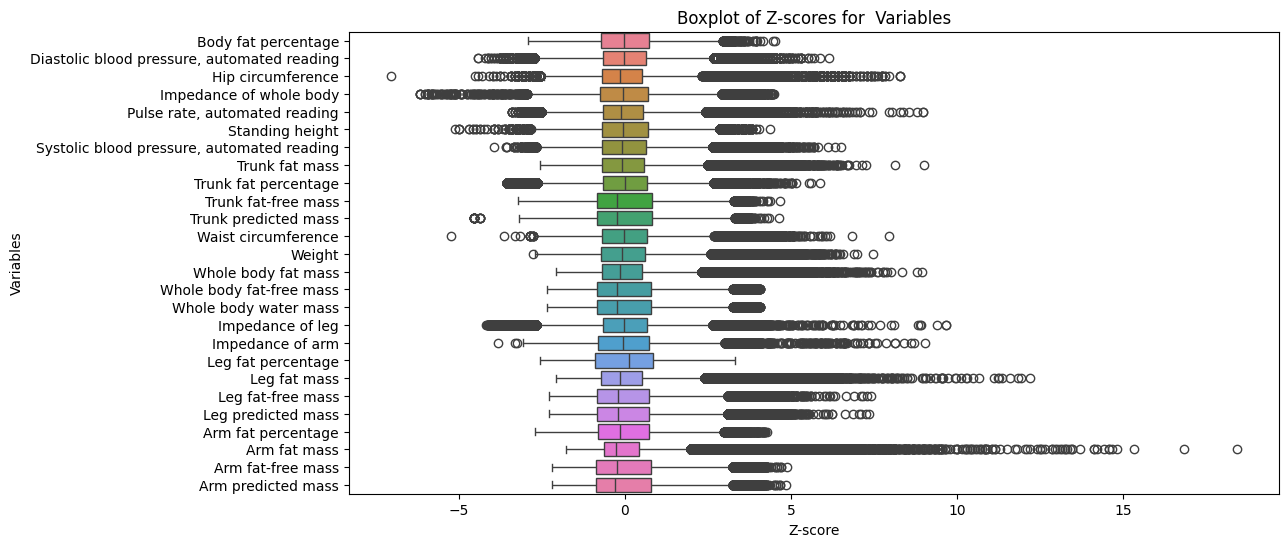

In [58]:
#boxplot to see outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=new_physical_measures_df.iloc[:,1:], orient='h')
plt.title('Boxplot of Z-scores for  Variables')
plt.xlabel('Z-score')
plt.ylabel('Variables')
plt.show()

Histograms

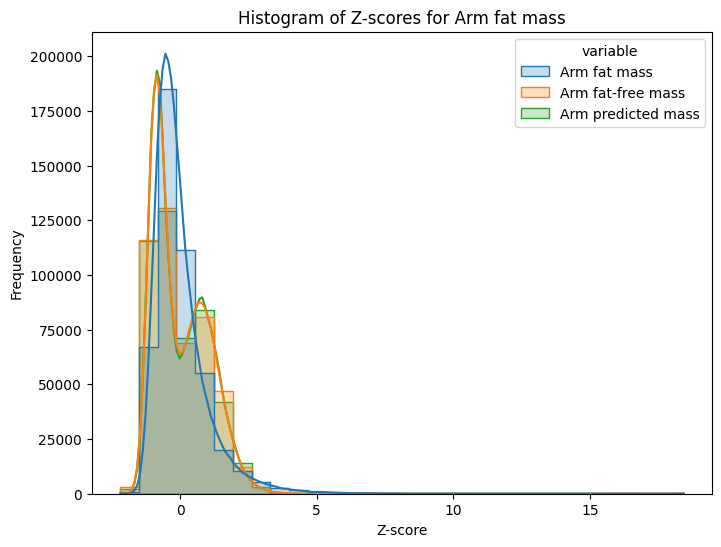

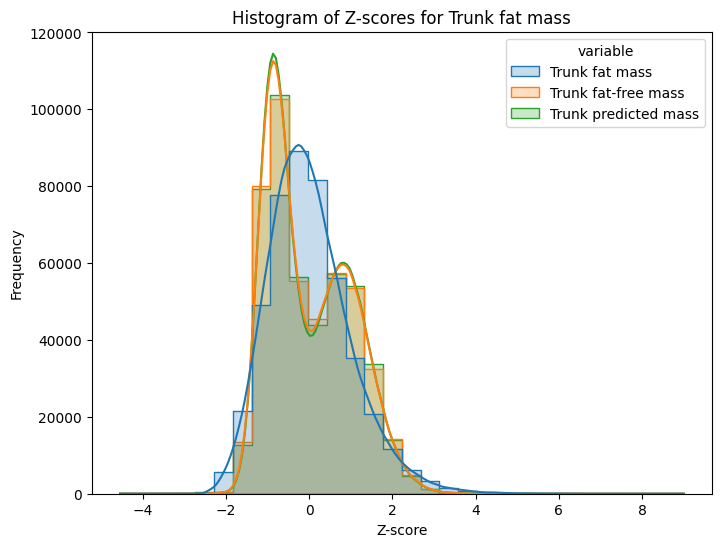

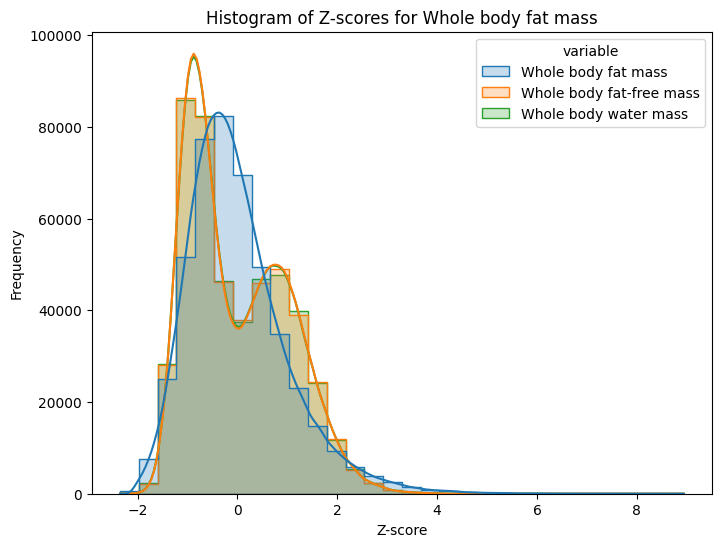

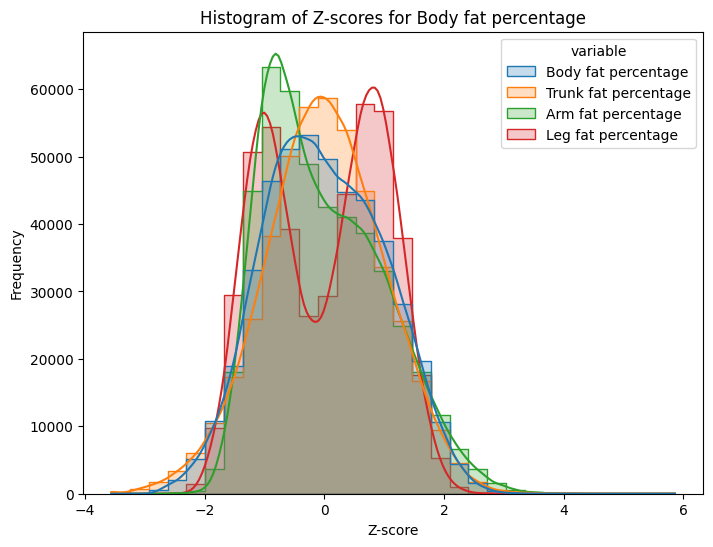

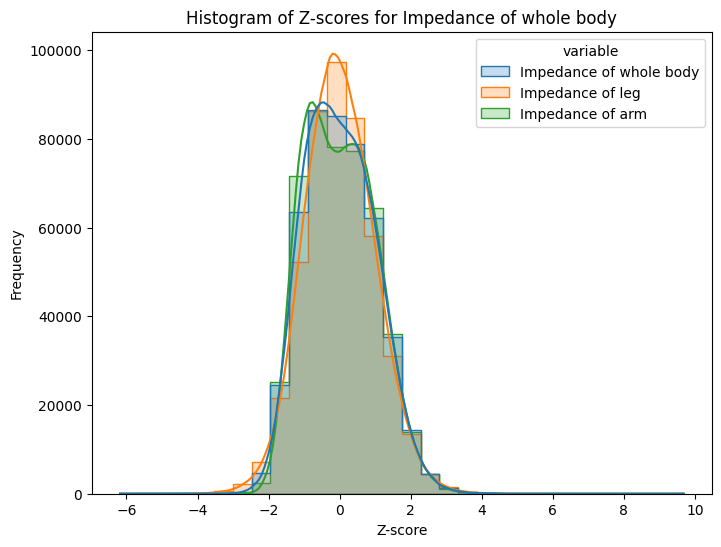

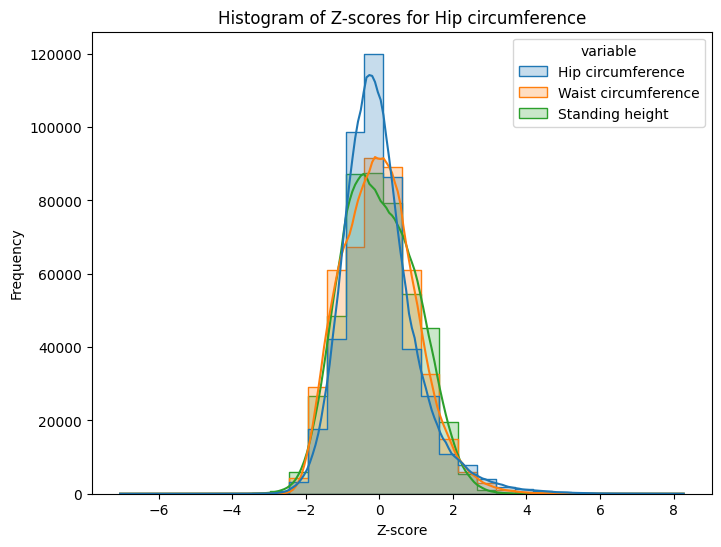

In [67]:
list_of_groups = [arm_columns, trunk_columns, body_columns, percentage_columns, impedance_columns, selected_columns]
# iterate through the list of groups 
#create a histogram for each group
for group in list_of_groups:
    # Create a histogram for each group
    df_long = pd.melt(new_physical_measures_df, id_vars=['eid'], value_vars=group)
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_long, x='value', hue='variable', kde=True, bins=30, element="step")
    plt.title(f'Histogram of Z-scores for {group[0]}')
    plt.xlabel('Z-score')
    plt.ylabel('Frequency')

Detect and remove Outliers

In [68]:
# Function to print outliers
def print_outliers(df):
    outliers_info = []
    for col in df.select_dtypes(include='number').columns:
        # Calculate IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        count_outliers = outliers.shape[0]
        total = df[col].shape[0]
        proportion = count_outliers / total
        # Append to the list
        outliers_info.append({
            'Column': col,
            'Outliers': count_outliers,
            'Total_data': total,
            'Outliers_proportion': proportion
        })
    outliers_df = pd.DataFrame(outliers_info)

    print(outliers_df)

In [69]:
# Columns with outliers before removing them
print_outliers(new_physical_measures_df)

                                         Column  Outliers  Total_data  \
0                                           eid         0      461792   
1                           Body fat percentage       171      461792   
2   Diastolic blood pressure, automated reading      4397      461792   
3                             Hip circumference     13087      461792   
4                       Impedance of whole body      1398      461792   
5                 Pulse rate, automated reading      9824      461792   
6                               Standing height      1034      461792   
7    Systolic blood pressure, automated reading      5143      461792   
8                                Trunk fat mass      8451      461792   
9                          Trunk fat percentage      3847      461792   
10                          Trunk fat-free mass       229      461792   
11                         Trunk predicted mass       224      461792   
12                          Waist circumference    

In [70]:
# Function to remove rows with outliers using Tukey's method
def remove_outliers_tukey(df):
    new_df = df.copy()
    for col in new_df.select_dtypes(include='number').columns:
        
        new_df[col] = new_df[col].astype(float)
        Q1 = new_df[col].quantile(0.25)
        Q3 = new_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify Outliers
        outliers = (new_df[col] < lower_bound) | (new_df[col] > upper_bound)
        
            
        # Drop rows where outliers are present in this column
        new_df = new_df[~outliers]
    return new_df


In [71]:
new_physical_measures_df.shape

(461792, 27)

In [72]:
# Remove outliers using Tukey's method
preprocessed_physical_measures_df = remove_outliers_tukey(new_physical_measures_df)

Correlation

In [73]:
# Calculate the correlation matrix without 'eid'
corr_matrix = preprocessed_physical_measures_df[preprocessed_physical_measures_df.columns.difference(['eid'])].corr()

In [74]:
# Reset the index and melt the matrix into a long-form DataFrame
corr_long = corr_matrix.reset_index().melt(id_vars='index')
corr_long.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Remove duplicate pairs (e.g., A-B and B-A) and self-pairs (A-A)
corr_long = corr_long[corr_long['Variable 1'] < corr_long['Variable 2']]

# Sort by covariance in descending order
cov_ranked = corr_long.sort_values(by='Correlation', ascending=False).reset_index(drop=True)

# Display the ranked table
print(cov_ranked.head(10))  # Top 10 highest covariances

                 Variable 1                Variable 2  Correlation
0       Trunk fat-free mass      Trunk predicted mass     0.999901
1         Leg fat-free mass        Leg predicted mass     0.999819
2  Whole body fat-free mass     Whole body water mass     0.999481
3         Arm fat-free mass        Arm predicted mass     0.999196
4       Trunk fat-free mass  Whole body fat-free mass     0.993781
5      Trunk predicted mass     Whole body water mass     0.993703
6      Trunk predicted mass  Whole body fat-free mass     0.993700
7       Trunk fat-free mass     Whole body water mass     0.993683
8        Arm predicted mass     Whole body water mass     0.990465
9         Arm fat-free mass     Whole body water mass     0.990429


In [75]:
#Print the bottom 10 lowest covariances
print(cov_ranked.tail(10)) 

                  Variable 1                Variable 2  Correlation
315  Impedance of whole body      Trunk predicted mass    -0.844424
316  Impedance of whole body       Trunk fat-free mass    -0.845161
317  Impedance of whole body  Whole body fat-free mass    -0.845588
318         Impedance of arm  Whole body fat-free mass    -0.846469
319  Impedance of whole body     Whole body water mass    -0.846856
320         Impedance of arm     Whole body water mass    -0.847331
321         Impedance of arm       Trunk fat-free mass    -0.852685
322         Impedance of arm      Trunk predicted mass    -0.852777
323        Arm fat-free mass          Impedance of arm    -0.869318
324       Arm predicted mass          Impedance of arm    -0.869417


In [76]:
# Select the columns with low correlation
cov_ranked[(cov_ranked['Correlation'] < 0.1) & (cov_ranked['Correlation'] > -0.1)]

,Variable 1,Variable 2,Correlation
182,Leg predicted mass,Whole body fat mass,0.094528
183,"Systolic blood pressure, automated reading",Trunk fat percentage,0.090654
184,"Pulse rate, automated reading","Systolic blood pressure, automated reading",0.086183
185,"Pulse rate, automated reading",Waist circumference,0.079709
186,Arm fat mass,Arm fat-free mass,0.068973
187,Arm fat mass,Whole body water mass,0.067679
188,Arm fat mass,Arm predicted mass,0.064727
189,Arm fat mass,Whole body fat-free mass,0.064703
190,Hip circumference,"Pulse rate, automated reading",0.062637
191,Body fat percentage,Waist circumference,0.061312


Heat Map

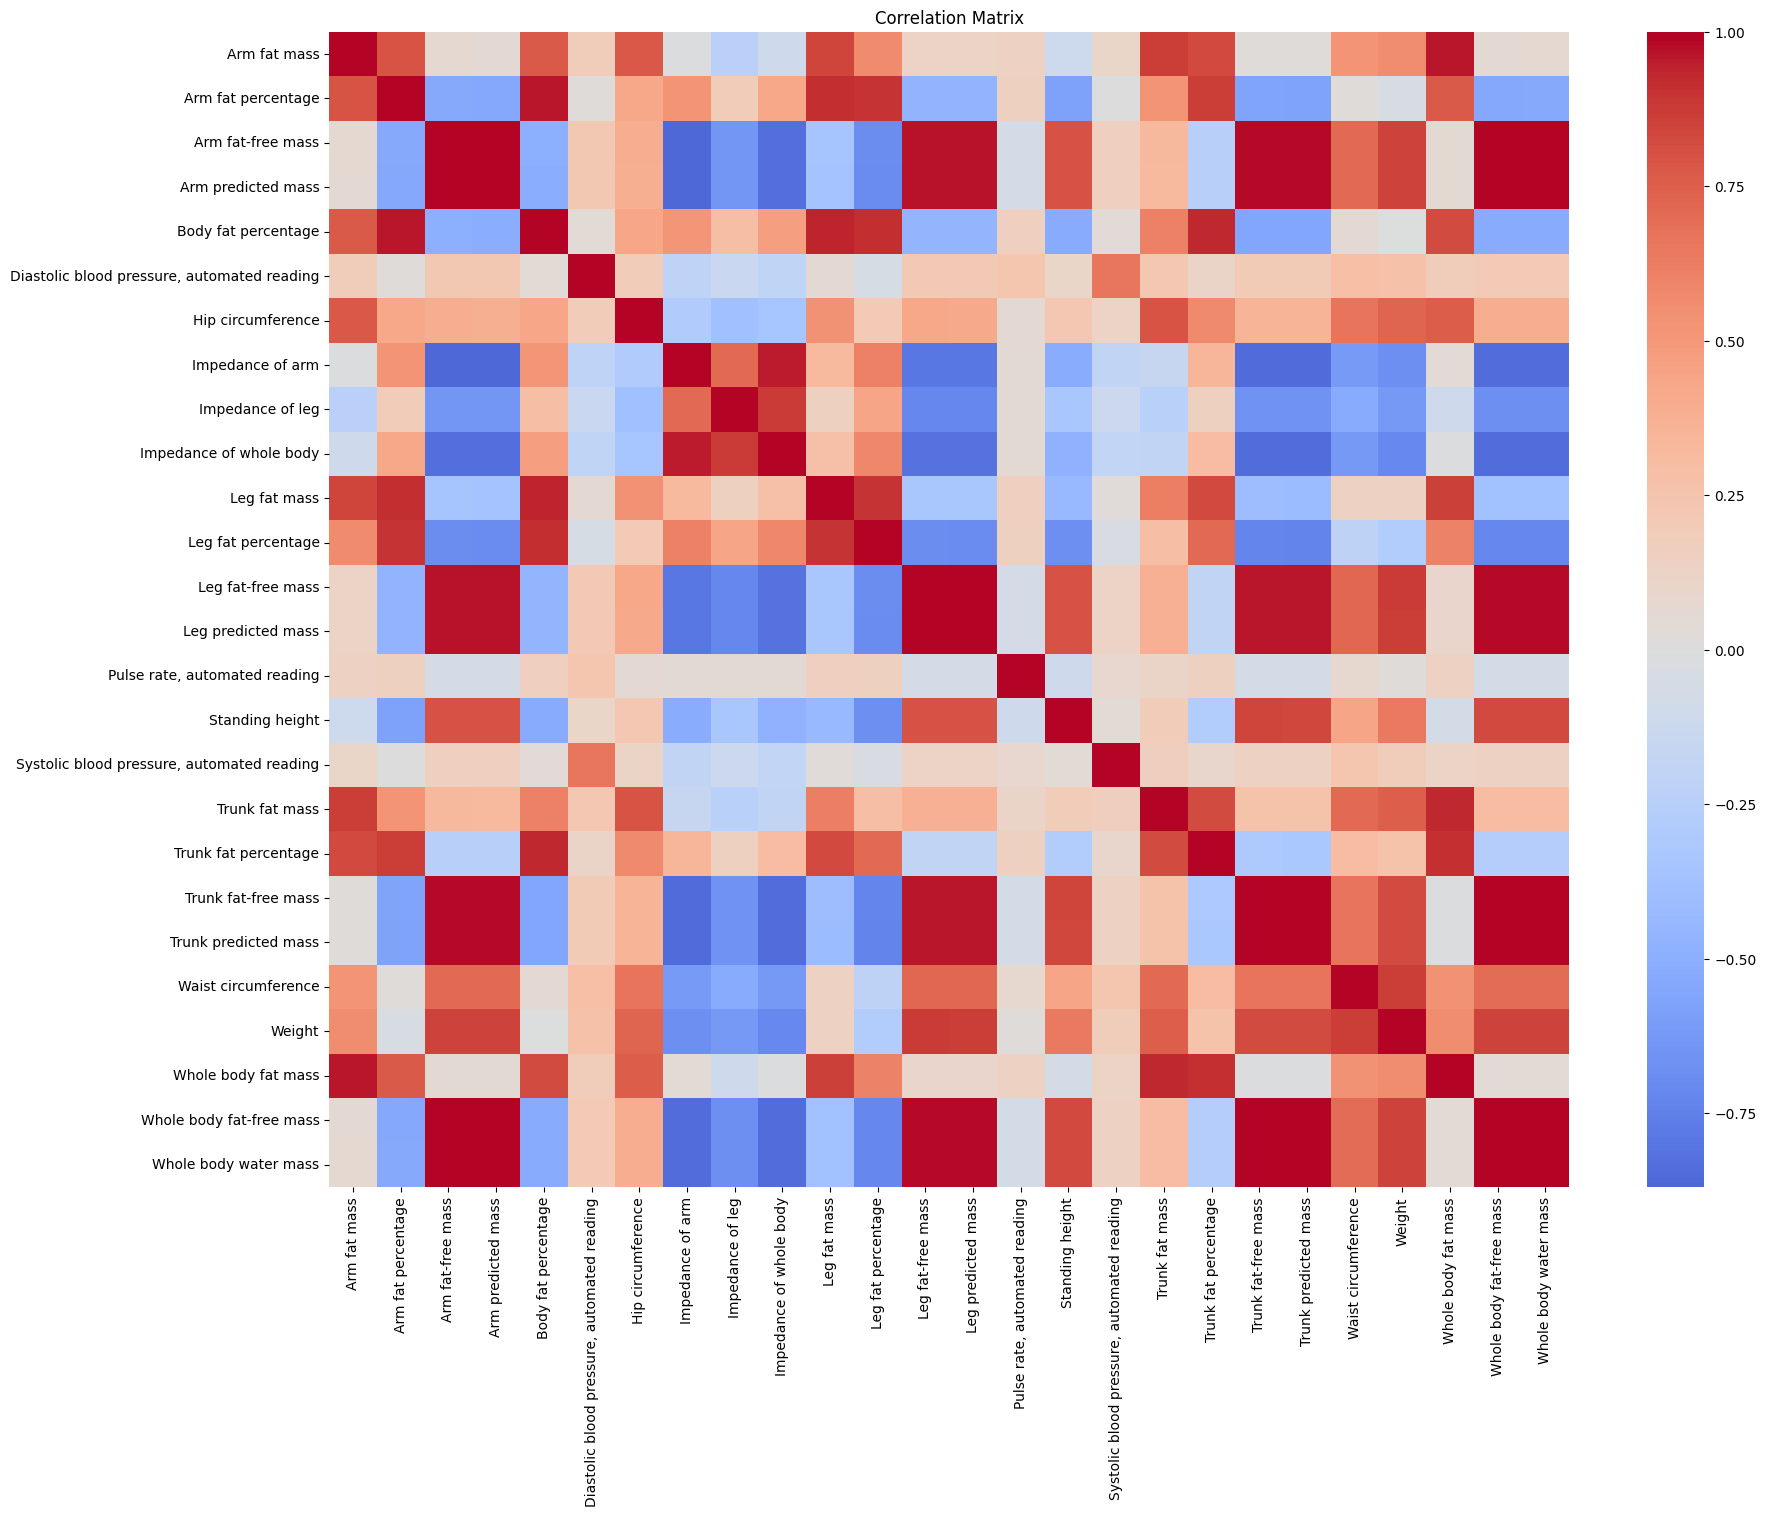

In [77]:
# Plot the correlation matrix 
sample_df = preprocessed_physical_measures_df[preprocessed_physical_measures_df.columns.difference(['eid'])]
corr_matrix = sample_df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [78]:
preprocessed_physical_measures_df.to_csv('preprocessed_physical_measures_df.csv', index=False)

In [3]:
# Read csv file
preprocessed_physical_measures_df = pd.read_csv('preprocessed_physical_measures_df.csv', sep=',', low_memory=False) 